# Feeder

Technical Test - Data Science Engineer For eFishery

let's see the sample data

In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dt

In [2]:
directory = os.getcwd()

In [3]:
file = directory + "/dataset/dataset/051.xlsx"
df = pd.read_excel(file, index_col=None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   timestamp  5200 non-null   int64
 1   x          5200 non-null   int64
 2   y          5200 non-null   int64
 3   z          5200 non-null   int64
 4   label      5200 non-null   int64
dtypes: int64(5)
memory usage: 203.2 KB


In [5]:
df

,timestamp,x,y,z,label
0,1657093314320,3,239,34,1
1,1657093314360,9,247,30,1
2,1657093314400,8,252,31,1
3,1657093314440,0,255,37,1
4,1657093314480,-12,252,39,1
...,...,...,...,...,...
5195,1657093522120,1,248,38,0
5196,1657093522160,0,248,37,0
5197,1657093522200,-1,248,38,0
5198,1657093522240,-2,248,37,0


### 1. Cara mengetahui durasi makan ikan

Dilihat dari interval antara timestamp dimana terjadi perubahan nilai kelas dari 1 ke 0 yaitu saat ikan sedang makan hingga timestamp ikan sedang tidak makan.

Lalu inisiasi fungsi yang dapat menunjukan kapan terjadi perubahan label. Pertama di inisiasikan terlebih dahulu status mulai dari data, jika di timestamp paling pertama label bernilai 0 maka keadaan ikan sedang tidak makan, namun jika di timestamp paling pertama label bernilai 1 maka keadaan ikan sedang makan. Lalu fungsi yang dibuat akan mendeteksi perubahan label dan menandakan perubahan status dimana jika dari 0 ke 1 berarti ikan mulai makan dan 1 ke 0 berarti ikan berhenti makan. Berikut fungsi dari durasiMakan():

In [6]:
def msToHMS(milis):
    seconds=int(milis/1000)%60
    minutes=int(milis/(1000*60))%60
    hours=int(milis/(1000*60*60))%24
    mil = milis%1000
    res = str(hours) + ':' + str(minutes) + ':' + str(seconds) + '.' + str(mil)
    return res

def durasiMakan():
    # check starting value
    curr = df['label'][0]
    dur = df['timestamp'][0]
    if curr == 1:
        timestamp = datetime.datetime.fromtimestamp((df['timestamp'][0]) / 1000) 
        print('start eating at :', timestamp.strftime("%X.%f")[:-3])
    else :
        timestamp = datetime.datetime.fromtimestamp((df['timestamp'][0]) / 1000) 
        print('last eating at :', timestamp.strftime("%X.%f")[:-3])
        
    # looping through data, check if there is a change in trend in label
    for i in df.index:
        if df['label'][i] != curr:
            curr = df['label'][i]
            if curr == 0:
                timestamp = datetime.datetime.fromtimestamp((df['timestamp'][i]) / 1000) 
                print('stop eating at :', timestamp.strftime("%X.%f")[:-3])
                durasi = msToHMS(df['timestamp'][i]-dur)
                print("durasi makan :", durasi, "\n")
#                 print("\n")
            else:
                durasi = msToHMS(df['timestamp'][i]-dur)
                print("durasi berhenti :", durasi)
                timestamp = datetime.datetime.fromtimestamp((df['timestamp'][i]) / 1000) 
                print('start eating at :', timestamp.strftime("%X.%f")[:-3])
            dur = df['timestamp'][i]

In [7]:
durasiMakan()

start eating at : 14:41:54.320
stop eating at : 14:43:38.320
durasi makan : 0:1:44.0 



Dari keluaran fungsi tersebut dapat dilihat bahwa status dari ikan dimulai dari makan, ditandai dengan label bernilai 1. Saat ada perubahan nilai label yaitu berubah menjadi 0, fungsi akan mengeluarkan pesan berhenti makan dan durasi dari makan ikan.

### 2. Jadwal feeding

karena data yang terdapat di dataset tersebar menjadi beberapa file, lebih baik dilakukan penyatuan data terlebih dahulu berdasarkan urutan timestamp dan dilakukan analisis

In [8]:
file1 = directory + "/dataset/dataset/051.xlsx"
file2 = directory + "/dataset/dataset/101.xlsx"
file3 = directory + "/dataset/dataset/102.xlsx"
file4 = directory + "/dataset/dataset/103.xlsx"
file5 = directory + "/dataset/dataset/161.xlsx"
file6 = directory + "/dataset/dataset/162.xlsx"
file7 = directory + "/dataset/dataset/163.xlsx"

In [9]:
df1 = pd.read_excel(file1, index_col=None)
df2 = pd.read_excel(file2, index_col=None)
df3 = pd.read_excel(file3, index_col=None)
df4 = pd.read_excel(file4, index_col=None)
df5 = pd.read_excel(file5, index_col=None)
df6 = pd.read_excel(file6, index_col=None)
df7 = pd.read_excel(file7, index_col=None)

dilakukan penggabungan dan pengurutan dari data berdasarkan timestamp

In [10]:
df = pd.merge_ordered(df1,df2,fill_method='ffill')
df = pd.merge_ordered(df,df3,fill_method='ffill')
df = pd.merge_ordered(df,df4,fill_method='ffill')
df = pd.merge_ordered(df,df5,fill_method='ffill')
df = pd.merge_ordered(df,df6,fill_method='ffill')
df = pd.merge_ordered(df,df7,fill_method='ffill')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28392 entries, 0 to 28391
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   timestamp  28392 non-null  int64
 1   x          28392 non-null  int64
 2   y          28392 non-null  int64
 3   z          28392 non-null  int64
 4   label      28392 non-null  int64
dtypes: int64(5)
memory usage: 1.1 MB


data yang diperoleh tidak memiliki nilai kosong. Untuk mengecek apakah antara data timestampnya padu, dilakukan dengan cara berikut

In [12]:
# check if the data is incrementally correct (every 40ms)
for i in range(len(df)-1):
    if df["timestamp"][i+1] != (df["timestamp"][i] + 40):
        print('missing data at',i)

tidak ada keluaran sehingga bisa disimpulkan timestamp data padu

mari kita visualisasikan data yang sudah digabungkan

script untuk menunjukan data dalam bentuk jam menit detik

In [13]:
lst = []

for i in df.index:
    timestamp = datetime.datetime.fromtimestamp((df['timestamp'][i]) / 1000) 
#     print('stop eating at', )
    val = timestamp.strftime("%X.%f")[:-3]
    lst.append(val)
df_temp = pd.DataFrame(lst)
df ['hms'] = df_temp
time = dt.datestr2num(df['hms'])

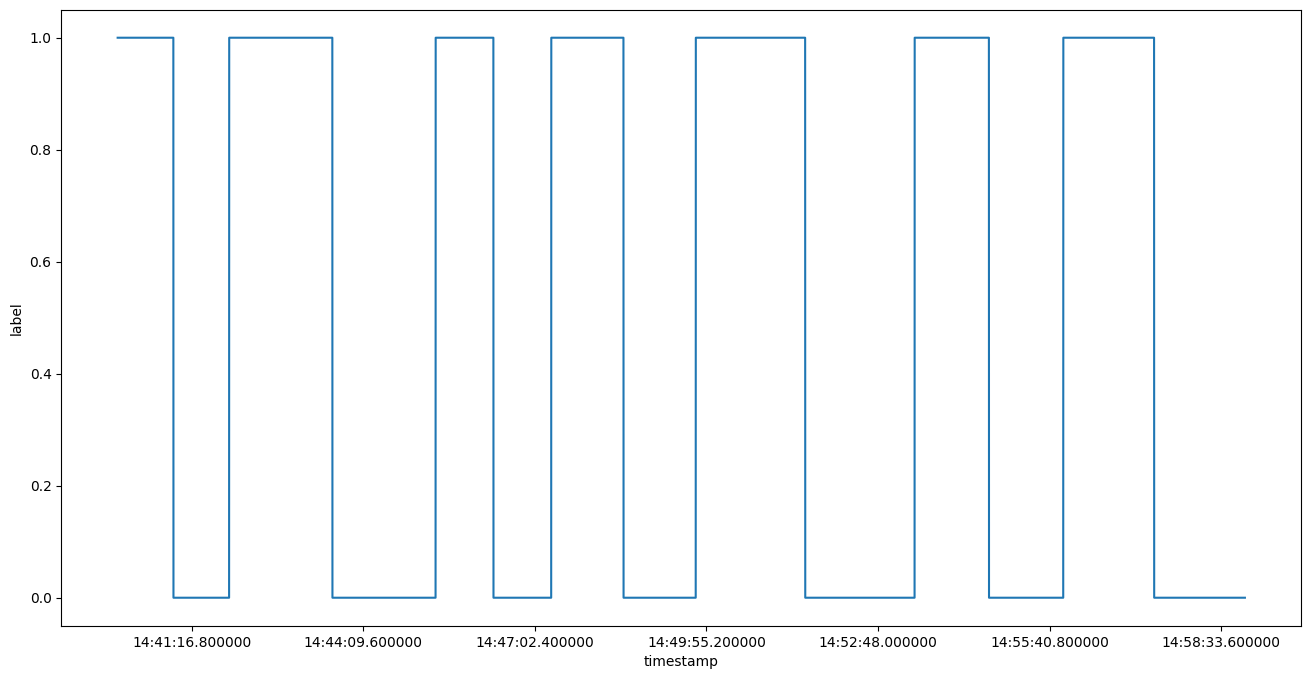

In [14]:
plt.figure(figsize=(16, 8))

plt.plot(time, df['label'])
plt.gca().xaxis.set_major_formatter(dt.DateFormatter("%X.%f"))
# naming the x axis
plt.xlabel('timestamp')
# naming the y axis
plt.ylabel('label')
  
# function to show the plot
plt.show()

visualisasi data diatas dapat menunjukan timestamp makan dari ikan dengan melihat interval kurun waktu label bernilai 0 dan 1

dari fungsi yang sudah diinisiasikan sebelumnya, sekarang kita dapat melihat durasi makan ikan dan jadwal feeding dari keseluruhan data

In [15]:
# melihat durasi makan
durasiMakan()

start eating at : 14:40:02.000
stop eating at : 14:40:58.160
durasi makan : 0:0:56.160 

durasi berhenti : 0:0:56.160
start eating at : 14:41:54.320
stop eating at : 14:43:38.320
durasi makan : 0:1:44.0 

durasi berhenti : 0:1:44.0
start eating at : 14:45:22.320
stop eating at : 14:46:20.560
durasi makan : 0:0:58.240 

durasi berhenti : 0:0:58.240
start eating at : 14:47:18.800
stop eating at : 14:48:31.600
durasi makan : 0:1:12.800 

durasi berhenti : 0:1:12.800
start eating at : 14:49:44.400
stop eating at : 14:51:34.640
durasi makan : 0:1:50.240 

durasi berhenti : 0:1:50.240
start eating at : 14:53:24.880
stop eating at : 14:54:39.760
durasi makan : 0:1:14.880 

durasi berhenti : 0:1:14.880
start eating at : 14:55:54.640
stop eating at : 14:57:26.160
durasi makan : 0:1:31.520 



dari keluaran fungsi durasiMakan() dapat dilihat data durasi makan, start makan dan stop makan untuk menentukan jadwal feeding dari ikan. Data diatas menunjukan bahwa ikan biasa makan di durasi 56 detik hingga 1 menit 50 detik. Salah satu pola yang dapat dilihat bahwa durasi makan ikan akan sama dengan durasi berhenti makan dari ikan, jika ikan makan dalam waktu 56 detik 160 mili sekon maka ikan akan berhenti makan selama 56 detik 160 mili sekon sebelum memulai kembali makan.

Untuk 17 menit 24 detik 160 mli sekon, ikan makan sebanyak 7 kali. Jika diberikan pakan 5kg untuk tiap event makan maka dibutuhkan 35kg pakan untuk durasi waktu tersebut

Untuk memprediksi jadwal feeding berikutnya, data dari akselerometer dapat digunakan. Dengan melihat trend dari akselerasi tiap axis

## 3. Prediksi makan ikan

Dari data yang sudah diperoleh dan dijabarkan sebelumnya, kita dapat melihat besar akselerasi tiap axis dengan waktu. Berikut merupakan visualisasi dari data tersebut untuk 3 axis

In [16]:
df.describe()

,timestamp,x,y,z,label
count,2.839200e+04,28392.000000,28392.000000,28392.000000,28392.000000
mean,1.657094e+12,-0.766484,245.575514,41.893738,0.500000
std,3.278484e+05,6.895088,8.203194,7.872899,0.500009
min,1.657093e+12,-97.000000,169.000000,-48.000000,0.000000
25%,1.657093e+12,-2.000000,243.000000,38.000000,0.000000
50%,1.657094e+12,0.000000,246.000000,42.000000,0.500000
75%,1.657094e+12,1.000000,249.000000,45.000000,1.000000
max,1.657094e+12,190.000000,394.000000,352.000000,1.000000


inisiasi script untuk mempermudah pembagian data

In [17]:
change1 = []
change0 = []

for i in df.index:
#     timestamp = datetime.datetime.fromtimestamp((df['timestamp'][i]) / 1000) 
#     print('stop eating at', )
#     val = timestamp.strftime("%X.%f")[:-3]
#     lst.append(val)
    if df['label'][i] == 0:
        data = [0, 246, 42]
        change0.append(data)
        data2 = [df['x'][i], df['y'][i], df['z'][i]]
        change1.append(data2)
    else:
        data = [0,246,42]
        change1.append(data)
        data2 = [df['x'][i], df['y'][i], df['z'][i]]
        change0.append(data2)
        
df_1 = pd.DataFrame(change0, columns=['x', 'y', 'z'])
df_0 = pd.DataFrame(change1, columns=['x', 'y', 'z'])

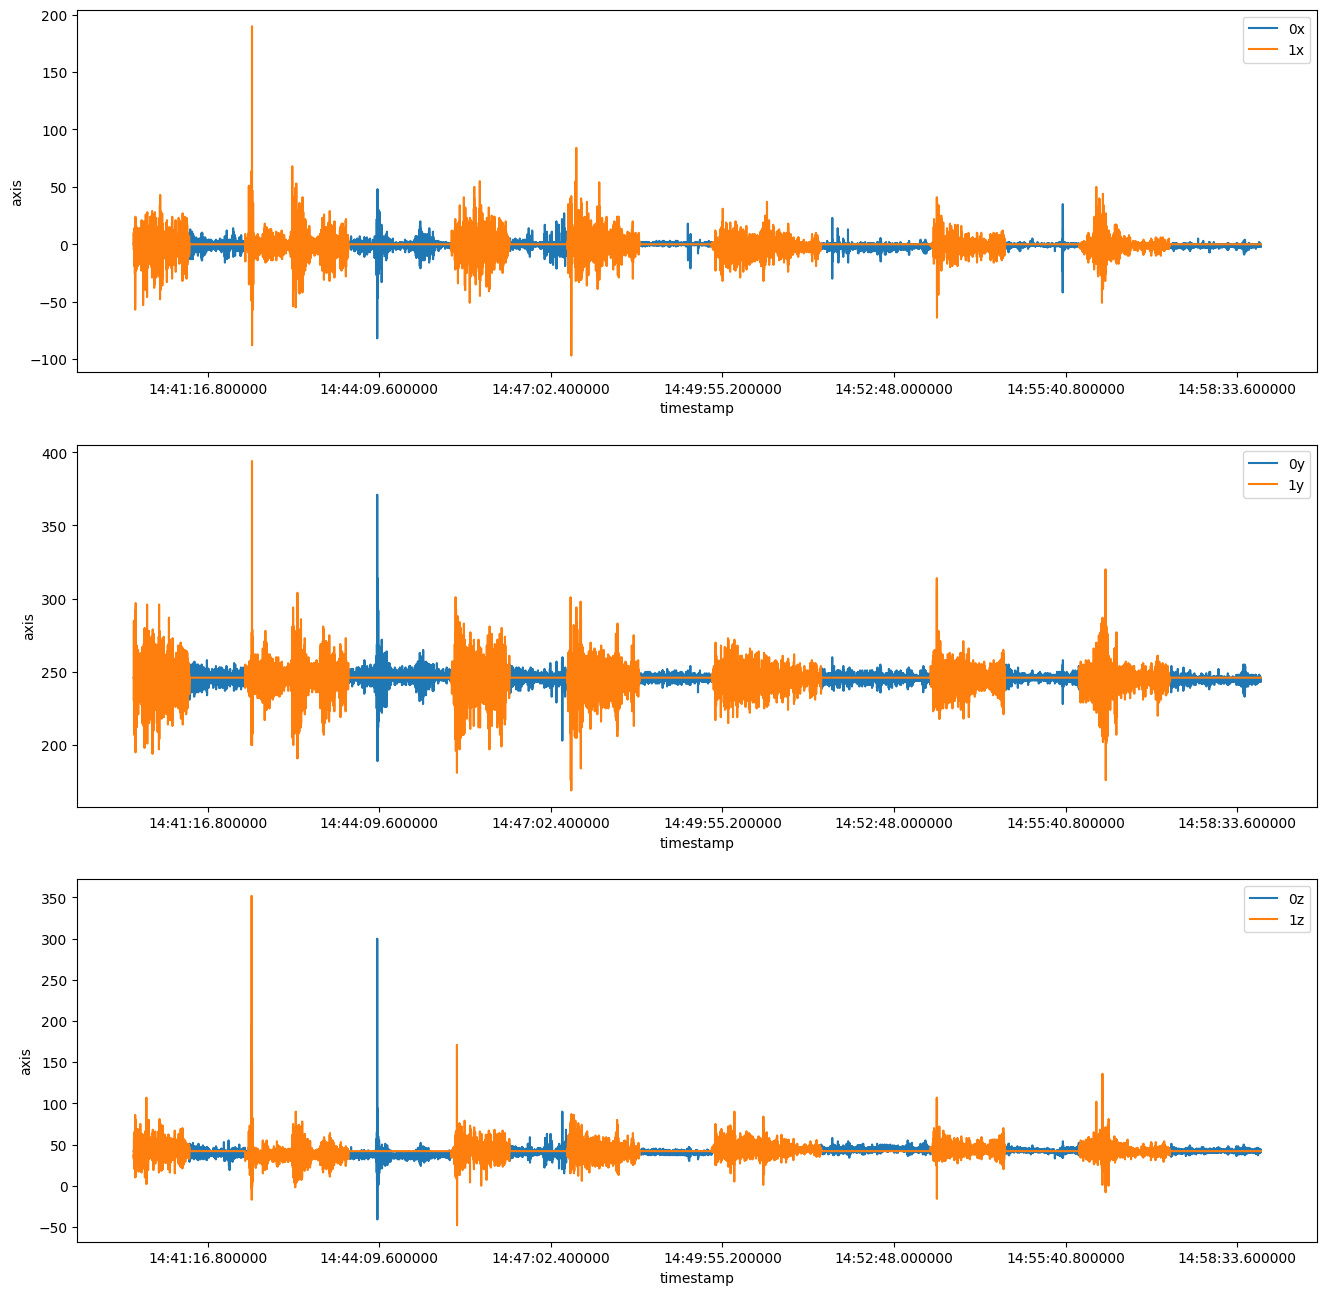

In [18]:
plt.figure(figsize=(16, 16))

plt.subplot(3, 1, 1)
plt.plot(time, df_0['x'], label = "0x")
plt.gca().xaxis.set_major_formatter(dt.DateFormatter("%H:%M:%S.%f"))

plt.plot(time, df_1['x'], label = "1x")
plt.gca().xaxis.set_major_formatter(dt.DateFormatter("%H:%M:%S.%f"))

# naming the x axis
plt.xlabel('timestamp')
# naming the y axis
plt.ylabel('axis')
  
# show a legend on the plot
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, df_0['y'], label = "0y")
plt.gca().xaxis.set_major_formatter(dt.DateFormatter("%H:%M:%S.%f"))

plt.plot(time, df_1['y'], label = "1y")
plt.gca().xaxis.set_major_formatter(dt.DateFormatter("%H:%M:%S.%f"))

# naming the x axis
plt.xlabel('timestamp')
# naming the y axis
plt.ylabel('axis')
  
# show a legend on the plot
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, df_0['z'], label = "0z")
plt.gca().xaxis.set_major_formatter(dt.DateFormatter("%H:%M:%S.%f"))

plt.plot(time, df_1['z'], label = "1z")
plt.gca().xaxis.set_major_formatter(dt.DateFormatter("%H:%M:%S.%f"))

# naming the x axis
plt.xlabel('timestamp')
# naming the y axis
plt.ylabel('axis')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

visualisasi data diatas merupakan plot dari data akselerasi tiap axix dibedakan untuk label yang merepresentasi tiap warna. Warna biru merupakan representasi label bernilai 0 dan orange merupakan representasi label bernilai 1.

### Modelling

Untuk melakukan prediksi makan ikan, kita dapat melakukan klasifikasi keadaan makan ikan berdasar akselerasi tiap axis

In [19]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
df.describe()

,timestamp,x,y,z,label
count,2.839200e+04,28392.000000,28392.000000,28392.000000,28392.000000
mean,1.657094e+12,-0.766484,245.575514,41.893738,0.500000
std,3.278484e+05,6.895088,8.203194,7.872899,0.500009
min,1.657093e+12,-97.000000,169.000000,-48.000000,0.000000
25%,1.657093e+12,-2.000000,243.000000,38.000000,0.000000
50%,1.657094e+12,0.000000,246.000000,42.000000,0.500000
75%,1.657094e+12,1.000000,249.000000,45.000000,1.000000
max,1.657094e+12,190.000000,394.000000,352.000000,1.000000


Kita pisahkan fitur yang akan digunakan yaitu axis dan label dengan cara sebagai berikut

In [21]:
x = df.iloc[:,1:-2]

In [22]:
# y = df.iloc[:, [-2]]
y = df['label']

Pisahkan data menjadi data training dan data testing dengan cara sebagai berikut

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)

In [28]:
xtrain.shape, ytrain.shape

((22713, 3), (22713,))

Lalu kita dapat menginisiasi model dan melakukan training dengan data fitur akselerasi tiap axis

In [30]:
# Initiate the base model and fit the data into the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Digunakan KNN dengan besaran K = 3 sebagai insiasi awal untuk melihat akurasi

In [33]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)
scores = metrics.accuracy_score(ytest,ypred)
print(scores)

0.7652755766860363


In [34]:
result = metrics.confusion_matrix(ytest, ypred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(ytest, ypred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[2184  647]
 [ 686 2162]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2831
           1       0.77      0.76      0.76      2848

    accuracy                           0.77      5679
   macro avg       0.77      0.77      0.77      5679
weighted avg       0.77      0.77      0.77      5679



Besar skor dari hasil training dengan menggunakan K = 3 memberikan hasil dengan skor diatas, nilai dari akurasi dan skor f1 memberikan hasil yang cukup baik dan representatif dengan data training sebesar 80% data keseluruhan

untuk memaksimalkan hasil dari training menggunakan KNN, kita dapat melihat tren training untuk besaran masing-masing nilai K, dengan dilakukan sebagai berikut

In [35]:
range_k = range(1,21)
scores = {}
scores_list = []

for k in range_k:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(xtrain, ytrain)
    ypred = classifier.predict(xtest)
    scores[k] = metrics.accuracy_score(ytest,ypred)
    scores_list.append(metrics.accuracy_score(ytest,ypred))

Text(0, 0.5, 'Accuracy')

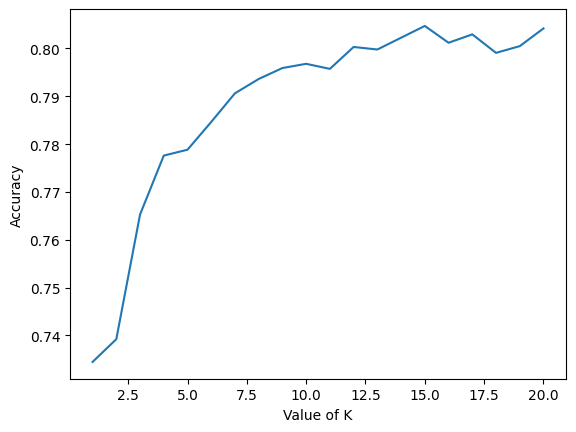

In [36]:
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

Dari hasil pelatihan dengan nilai K incremental dari 1 sampai 20, dapat dilihat besaran K akan stagnan ketika mencapai besaran K = 7. Dengan demikian dapat digunakan K sebesar 7

In [40]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)
scores = metrics.accuracy_score(ytest,ypred)
print(scores)

0.7906321535481599


In [41]:
result = metrics.confusion_matrix(ytest, ypred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(ytest, ypred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[2294  537]
 [ 652 2196]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      2831
           1       0.80      0.77      0.79      2848

    accuracy                           0.79      5679
   macro avg       0.79      0.79      0.79      5679
weighted avg       0.79      0.79      0.79      5679



Besar skor dari hasil training dengan menggunakan K = 7 memberikan hasil dengan skor diatas, nilai dari akurasi dan skor f1 memberikan hasil yang cukup baik dan representatif dengan data training sebesar 80% data keseluruhan. Nilai akurasi sebesar 0,79 dengan nilai precision dan recall untuk masing masing kelas berada di kisaran 0,77 hingga 0,81. 

### menyimpan model

In [42]:
import joblib
filename = 'model.sav'
joblib.dump(classifier, filename)

['model.sav']

### pengembangan lanjutan

dengan data yang diperoleh untuk timestamp tersebut merupakan data yang cukup representatif, kontekstual data di lapangan mungkin akan memberikan wawasan baru terkait beberapa aspek. Data akselerasi relatif akan lebih representatif jika dapat diperoleh integral 2 kali dari akselerasi yaitu perubahan posisi relatif dimana vibrasi dari alat akan lebih terbaca jika mengacu pada posisi relatifnya. Pengamatan data di domain frekuensi untuk posisi relatif juga akan menambah wawasan terkait frekeunsi tertentu yang dapat mencirikan label, misal di rentang frekuensi tertentu terdapat ciri spesifik ikan sedang makan atau tidak. 

Percobaan terhadap metode yang saya utarakan diatas telah dilakukan, namun karena keterbatasan dari wawasan data yang saya miliki, nilai dari integral 2 kali dari percepatan relatif tidak menunjukan hasil yang relevan.